In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('D:/Machine_learning/supervised/customer-churn_prediction/train.csv')

## Data Description

In [3]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


## Data Preprocessing

### checking for missing values

In [5]:
df.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

### checking for duplication

In [6]:
df.duplicated().any()

False

### categorical variables encoding

In [7]:
df.select_dtypes(include='object').columns

Index(['ID', 'Gender', 'Income', 'Product_Holdings', 'Credit_Category'], dtype='object')

In [8]:
df['ID'].nunique()

6650

In [9]:
# Dropping ID column
df = df.drop('ID', axis=1)

In [10]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Income', 'Product_Holdings', 'Credit_Category'], dtype='object')

In [11]:
for ele in df.select_dtypes(include='object').columns:
    print(ele)
    print(df[ele].value_counts().count())
    print(df[ele].value_counts())
    print('\n')

Gender
2
Male      3612
Female    3038
Name: Gender, dtype: int64


Income
4
10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64


Product_Holdings
3
1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64


Credit_Category
3
Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64




Gender


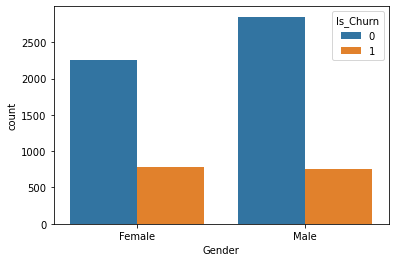

Income


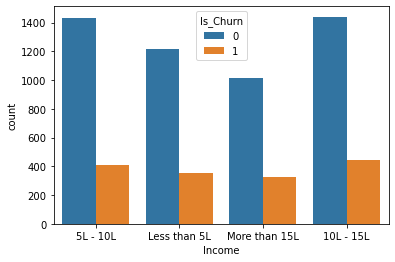

Product_Holdings


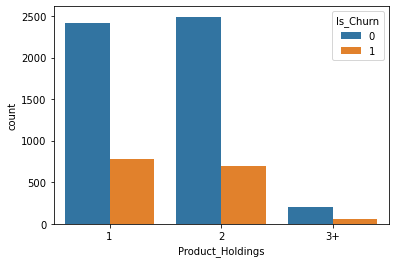

Credit_Category


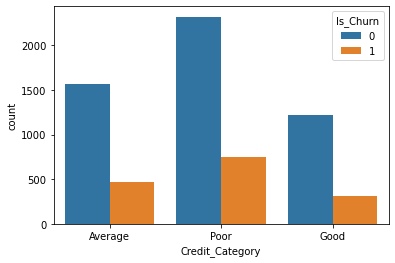

In [12]:
for ele in df.select_dtypes(include='object').columns:
    print(ele)
    sns.countplot(data=df, x=ele, hue='Is_Churn')
    plt.show()

In [13]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [14]:
df['Income'] = df['Income'].astype('category')
df['Income'] = df['Income'].cat.codes
df = pd.get_dummies(df, columns=['Income'], drop_first=True)

In [15]:
df['Product_Holdings'] = df['Product_Holdings'].astype('category')
df['Product_Holdings'] = df['Product_Holdings'].cat.codes
df = pd.get_dummies(df, columns=['Product_Holdings'], drop_first=True)

In [16]:
df['Credit_Category'] = df['Credit_Category'].astype('category')
df['Credit_Category'] = df['Credit_Category'].cat.codes
df = pd.get_dummies(df, columns=['Credit_Category'], drop_first=True)

In [17]:
df.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2
0,36,563266.44,4,0,0,1,0,1,0,0,0,0,0,0
1,53,875572.11,2,1,1,0,0,0,1,0,0,0,0,1
2,35,701607.06,2,1,0,0,0,0,0,1,1,0,0,1
3,43,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1
4,39,893146.23,1,1,1,1,0,0,0,1,0,0,1,0


## Five Number Summary

In [18]:
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128,0.543158,0.277744,0.236541,0.202256,0.478496,0.040301,0.230226,0.462556
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586,0.498171,0.447920,0.424990,0.401712,0.499575,0.196678,0.421009,0.498633
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


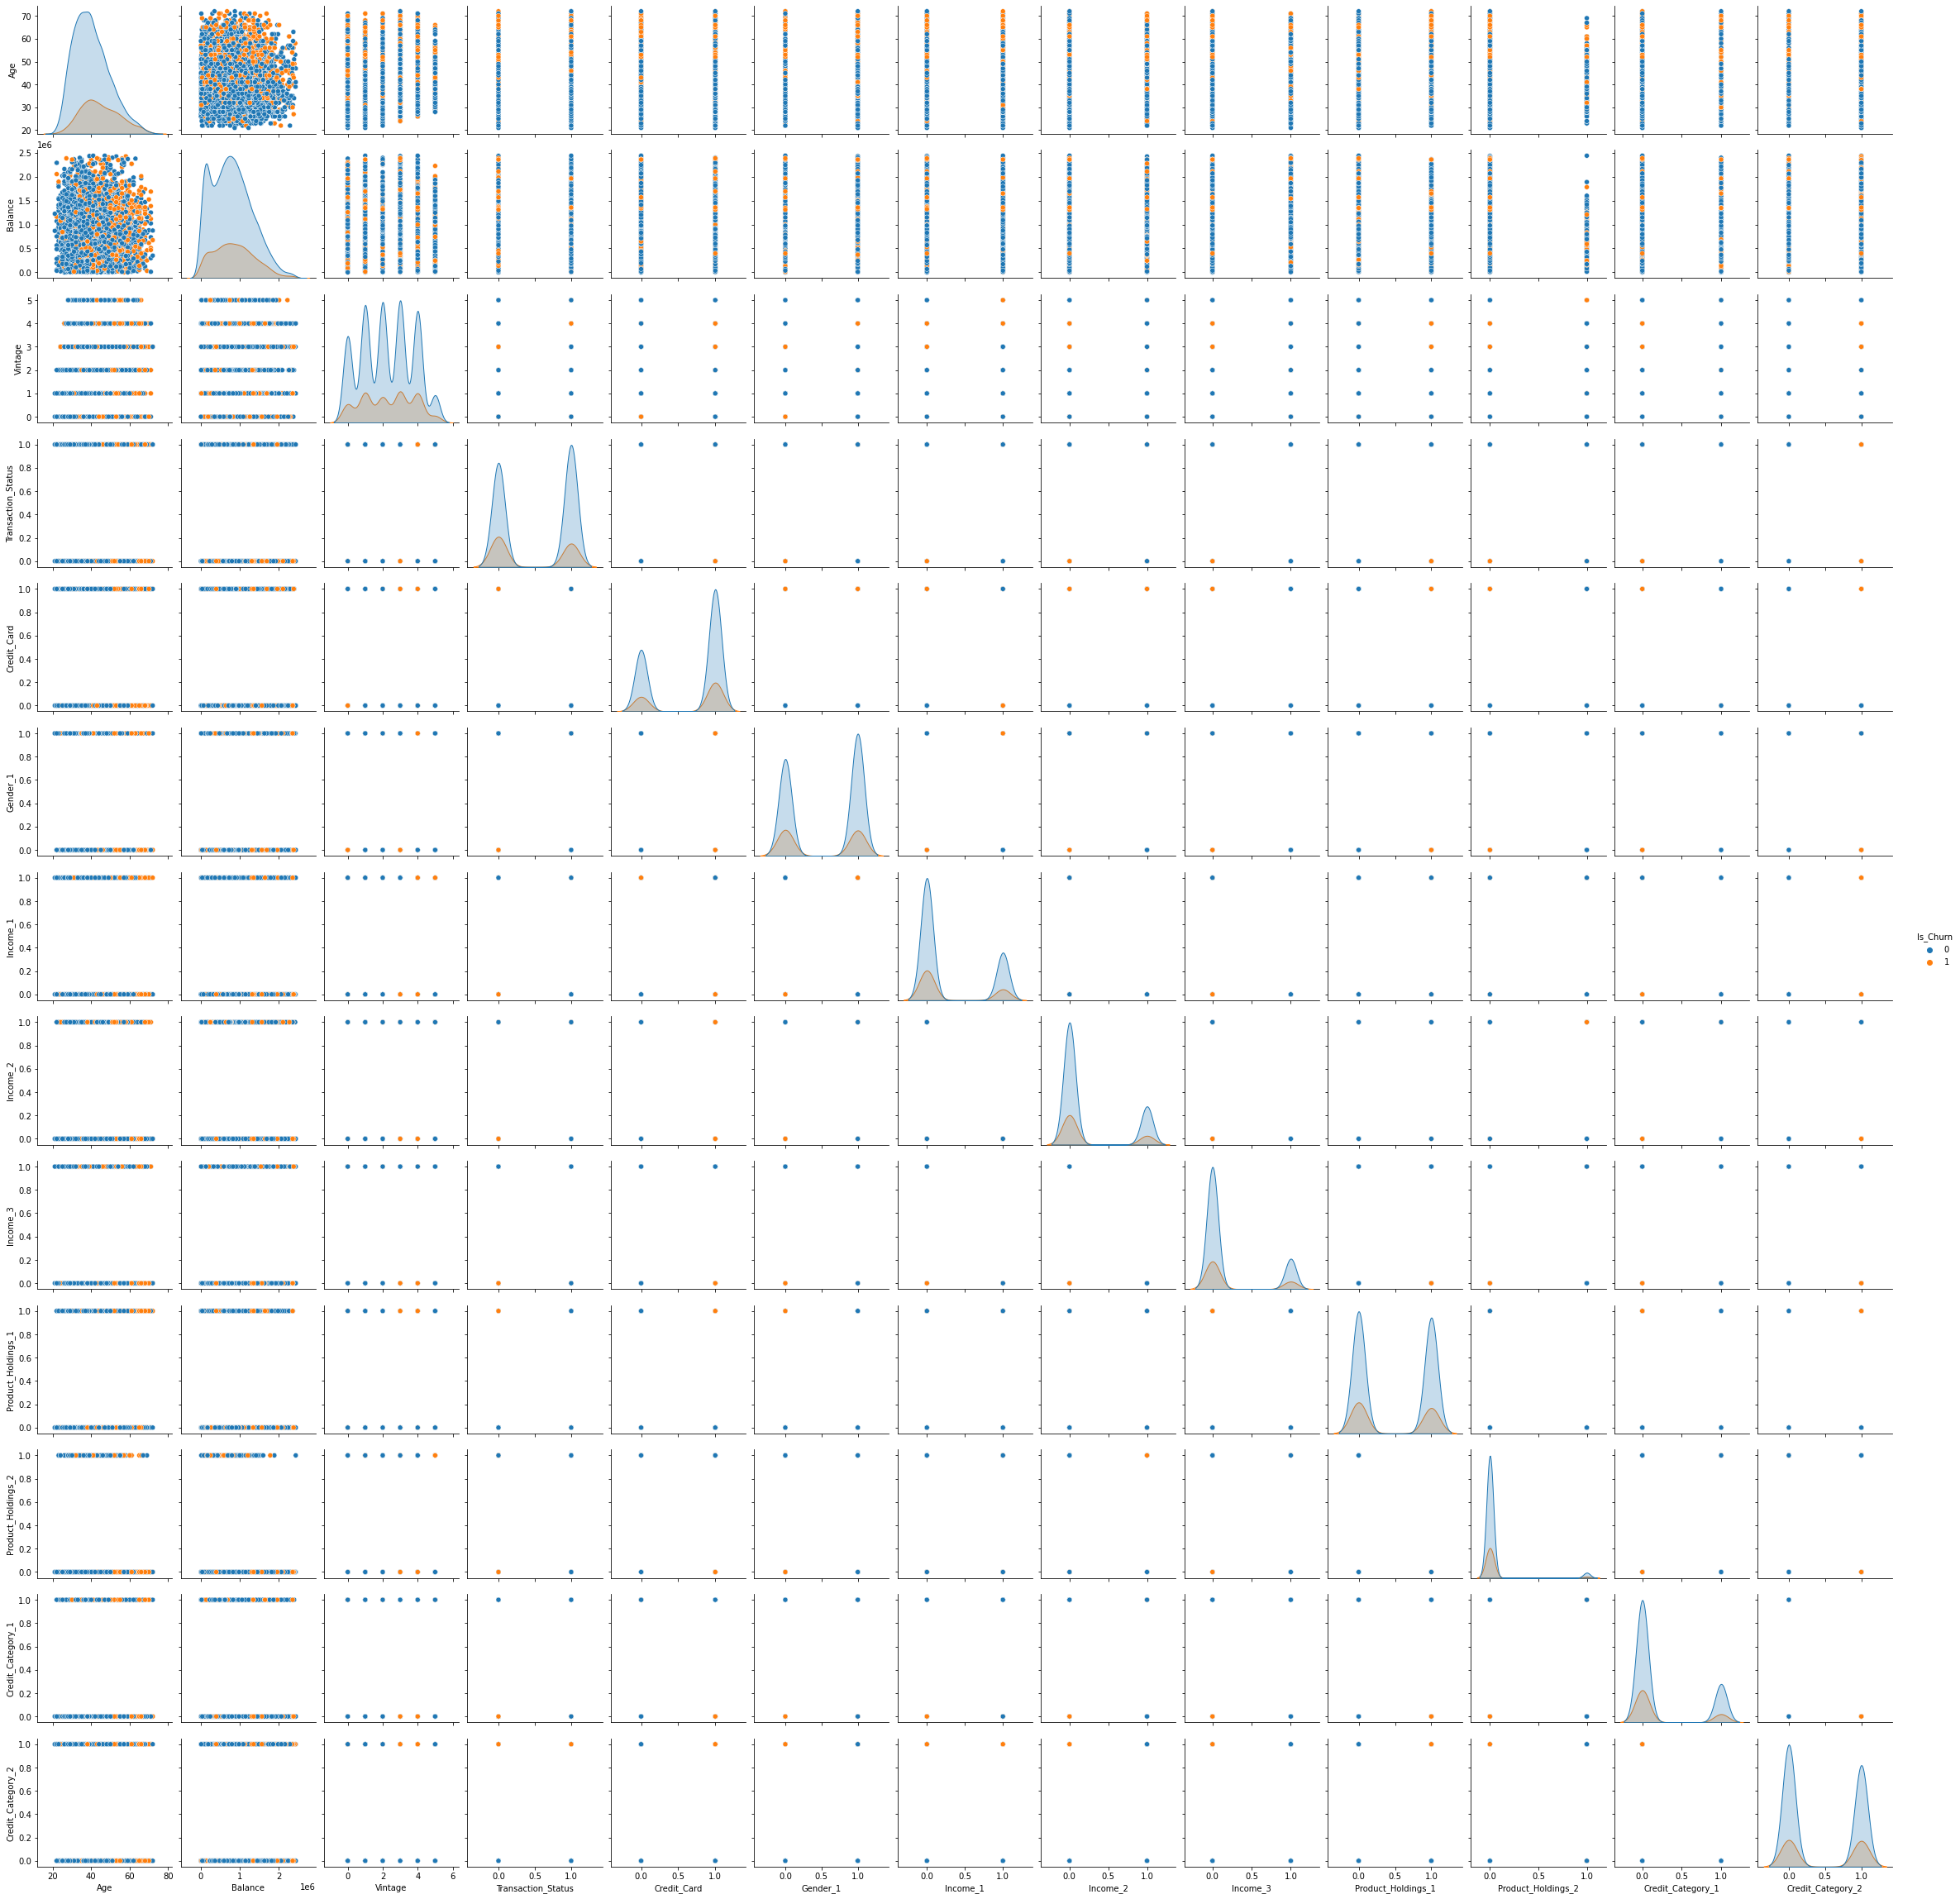

In [87]:
sns.pairplot(df, hue='Is_Churn')

In [88]:
df.skew()

Age                   0.555171
Balance               0.464460
Vintage               0.021421
Transaction_Status   -0.063204
Credit_Card          -0.696287
Is_Churn              1.275912
Gender_1             -0.173317
Income_1              0.992688
Income_2              1.240207
Income_3              1.482823
Product_Holdings_1    0.086114
Product_Holdings_2    4.676034
Credit_Category_1     1.281948
Credit_Category_2     0.150230
dtype: float64

## checking for Imbalance

In [89]:
df['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [90]:
# Data is imbalanced hence we can fine tune the model with oversampling, SMOTE

## Model Buliding

In [91]:
df.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2
0,36,563266.44,4,0,0,1,0,1,0,0,0,0,0,0
1,53,875572.11,2,1,1,0,0,0,1,0,0,0,0,1
2,35,701607.06,2,1,0,0,0,0,0,1,1,0,0,1
3,43,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1
4,39,893146.23,1,1,1,1,0,0,0,1,0,0,1,0


In [92]:
df['Age'].describe()

count    6650.000000
mean       41.130226
std         9.685747
min        21.000000
25%        34.000000
50%        40.000000
75%        47.000000
max        72.000000
Name: Age, dtype: float64

In [19]:
age_cond = [(df['Age'].between(df['Age'].min(), np.percentile(df['Age'], 25))), (df['Age'].between(np.percentile(df['Age'], 25), np.percentile(df['Age'], 50))), (df['Age'].between(np.percentile(df['Age'], 50), np.percentile(df['Age'], 75))), (df['Age'].between(np.percentile(df['Age'], 75), df['Age'].max()))]
age_labels = ['teen', 'mid', 'mid-old', 'old']
df['Age'] = np.select(age_cond, age_labels)
df.head()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2
0,mid,563266.44,4,0,0,1,0,1,0,0,0,0,0,0
1,old,875572.11,2,1,1,0,0,0,1,0,0,0,0,1
2,mid,701607.06,2,1,0,0,0,0,0,1,1,0,0,1
3,mid-old,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1
4,mid,893146.23,1,1,1,1,0,0,0,1,0,0,1,0


In [20]:
df['Age'] = df['Age'].astype('category')
df['Age'] = df['Age'].cat.codes
df = pd.get_dummies(df, columns=['Age'], drop_first=True)
df.head()

,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2,Age_1,Age_2,Age_3
0,563266.44,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,875572.11,2,1,1,0,0,0,1,0,0,0,0,1,0,1,0
2,701607.06,2,1,0,0,0,0,0,1,1,0,0,1,0,0,0
3,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0
4,893146.23,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0


In [95]:
df['Balance'].describe()

count    6.650000e+03
mean     8.045954e+05
std      5.157549e+05
min      6.300000e+01
25%      3.922642e+05
50%      7.649386e+05
75%      1.147124e+06
max      2.436616e+06
Name: Balance, dtype: float64

In [21]:
balance_cond = [(df['Balance'].between(df['Balance'].min(), np.percentile(df['Balance'], 25))), (df['Balance'].between(np.percentile(df['Balance'], 25), np.percentile(df['Balance'], 50))), (df['Balance'].between(np.percentile(df['Balance'], 50), np.percentile(df['Balance'], 75))), (df['Balance'].between(np.percentile(df['Balance'], 75), df['Balance'].max()))]
balance_labels = ['low', 'mid', 'high', 'huge']
df['Balance'] = np.select(balance_cond, balance_labels)
df.head()

,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2,Age_1,Age_2,Age_3
0,mid,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,high,2,1,1,0,0,0,1,0,0,0,0,1,0,1,0
2,mid,2,1,0,0,0,0,0,1,1,0,0,1,0,0,0
3,huge,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0
4,high,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0


In [22]:
df['Balance'] = df['Balance'].astype('category')
df['Balance'] = df['Balance'].cat.codes
df = pd.get_dummies(df, columns=['Balance'], drop_first=True)
df.head()

,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,Credit_Category_2,Age_1,Age_2,Age_3,Balance_1,Balance_2,Balance_3
0,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,2,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
3,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0
4,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [23]:
df['Vintage'] = df['Vintage'].astype('category')
df['Vintage'] = df['Vintage'].cat.codes
df = pd.get_dummies(df, columns=['Vintage'], drop_first=True)
df.head()

,Transaction_Status,Credit_Card,Is_Churn,Gender_1,Income_1,Income_2,Income_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_1,...,Age_2,Age_3,Balance_1,Balance_2,Balance_3,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

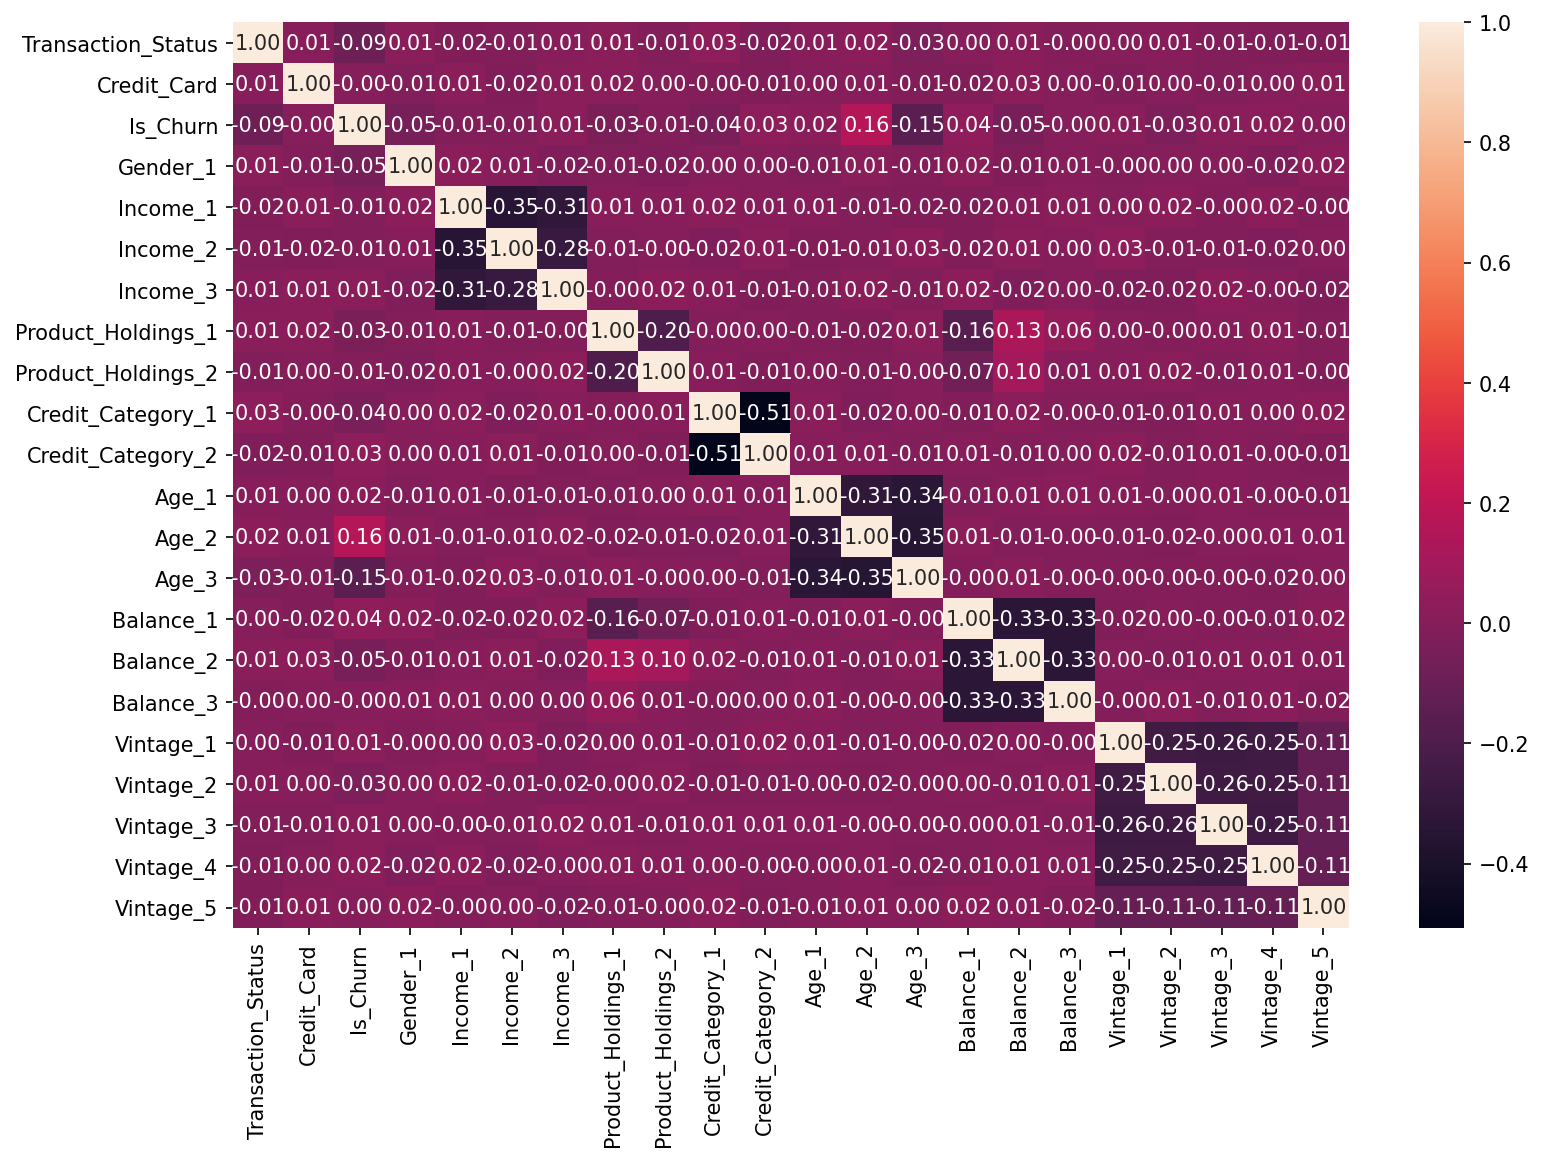

In [105]:
plt.figure(figsize=(12, 8), dpi=150)
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Transaction_Status  6650 non-null   int64
 1   Credit_Card         6650 non-null   int64
 2   Is_Churn            6650 non-null   int64
 3   Gender_1            6650 non-null   uint8
 4   Income_1            6650 non-null   uint8
 5   Income_2            6650 non-null   uint8
 6   Income_3            6650 non-null   uint8
 7   Product_Holdings_1  6650 non-null   uint8
 8   Product_Holdings_2  6650 non-null   uint8
 9   Credit_Category_1   6650 non-null   uint8
 10  Credit_Category_2   6650 non-null   uint8
 11  Age_1               6650 non-null   uint8
 12  Age_2               6650 non-null   uint8
 13  Age_3               6650 non-null   uint8
 14  Balance_1           6650 non-null   uint8
 15  Balance_2           6650 non-null   uint8
 16  Balance_3           6650 non-null   uint8


In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix, plot_roc_curve

In [25]:
X = df.drop('Is_Churn', axis=1)
y = df['Is_Churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [28]:
y_train.value_counts()

1    4096
0    4096
Name: Is_Churn, dtype: int64

## Decision Tree Model

In [29]:
tree_model = DecisionTreeClassifier(random_state=101)

In [118]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 5, 6],
              'min_samples_split': [100, 150, 200],
              'min_samples_leaf': [75, 125, 175]}

In [119]:
grid_tree = GridSearchCV(tree_model, param_grid, scoring='accuracy', cv=10)

In [120]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [75, 125, 175],
                         'min_samples_split': [100, 150, 200]},
             scoring='accuracy')

In [123]:
grid_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 125,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

In [30]:
tree_model.set_params(criterion = 'entropy', max_depth = 6, min_samples_leaf = 125, min_samples_split=100)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=125,
                       min_samples_split=100, random_state=101)

In [31]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=125,
                       min_samples_split=100, random_state=101)

In [32]:
train_pred = tree_model.predict(X_train)
test_pred = tree_model.predict(X_test)

In [33]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.64697265625
0.5917293233082707


In [34]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1017
           1       0.29      0.53      0.38       313

    accuracy                           0.59      1330
   macro avg       0.55      0.57      0.54      1330
weighted avg       0.69      0.59      0.62      1330



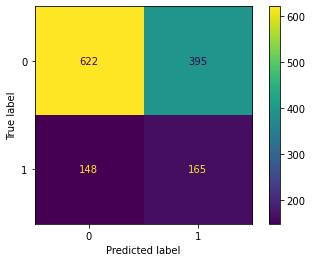

In [35]:
plot_confusion_matrix(tree_model, X_test, y_test)

In [36]:
from sklearn.tree import plot_tree

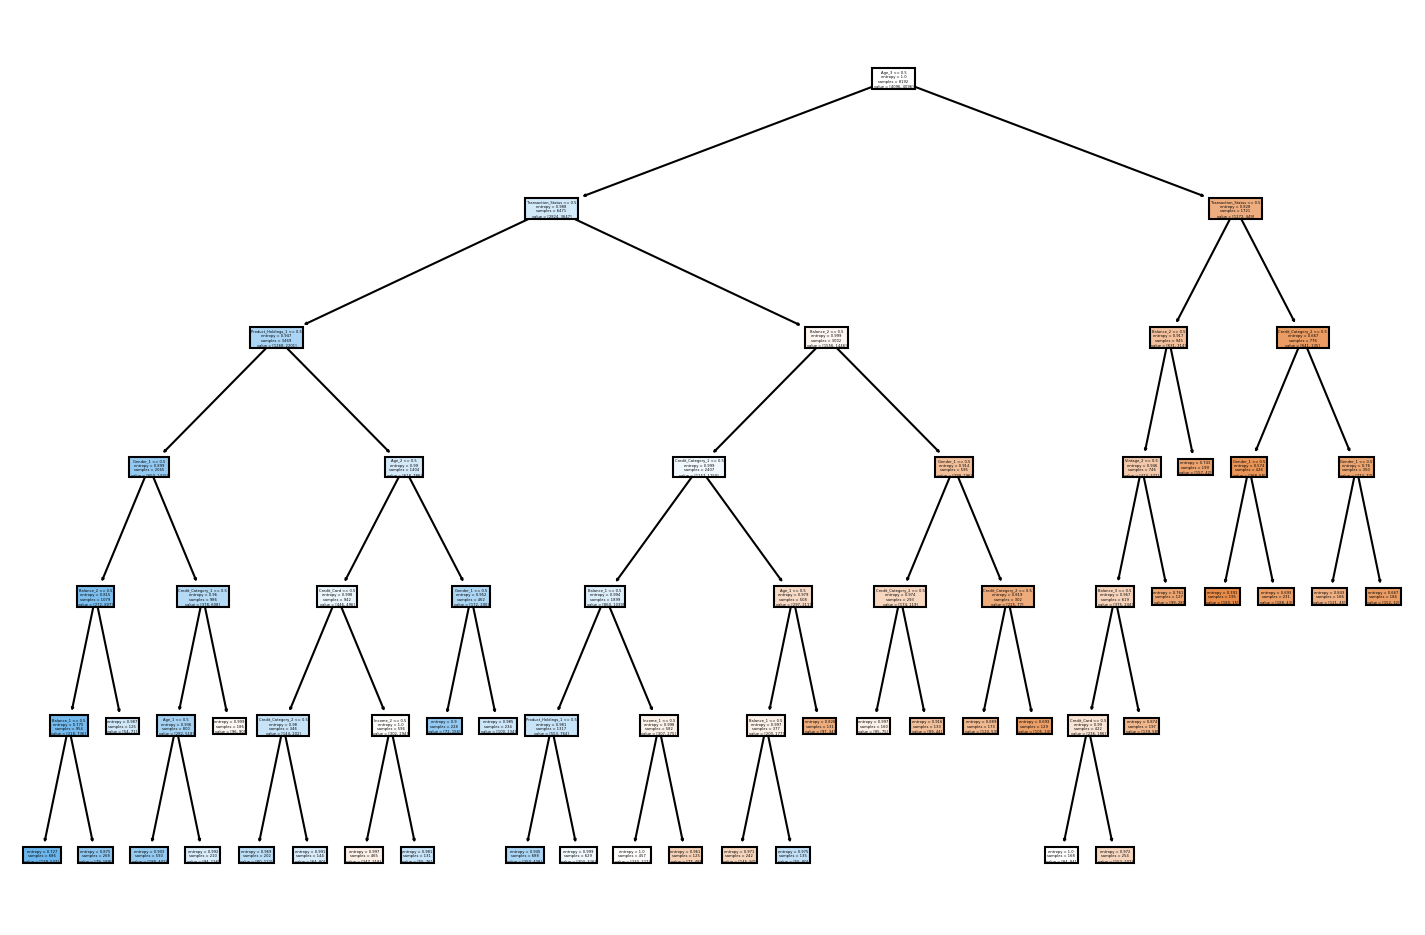

In [39]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X.columns);

In [40]:
rf_model = RandomForestClassifier(random_state=101)

In [41]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 5, 6],
              'min_samples_split': [100, 150, 200],
              'min_samples_leaf': [75, 125, 175]}

In [42]:
random_rf_model = GridSearchCV(rf_model, param_grid, scoring='accuracy', cv=10)

In [43]:
random_rf_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [75, 125, 175],
                         'min_samples_split': [100, 150, 200]},
             scoring='accuracy')

In [44]:
random_rf_model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 75,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [45]:
rf_model.set_params(criterion='gini', max_depth=6, min_samples_leaf=75, min_samples_split=100, oob_score=True)

RandomForestClassifier(max_depth=6, min_samples_leaf=75, min_samples_split=100,
                       oob_score=True, random_state=101)

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=75, min_samples_split=100,
                       oob_score=True, random_state=101)

In [54]:
error_rate = {}

for i in range(1,200):
    # Use n random trees
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_train, y_train)
    oob_error = 1 - rf_model.oob_score_
    error_rate[i] = oob_error

In [55]:
oob_series = pd.Series(error_rate)

In [56]:
oob_series

1      0.455811
2      0.429321
3      0.401611
4      0.386353
5      0.380371
         ...   
195    0.349976
196    0.349976
197    0.349854
198    0.349609
199    0.349854
Length: 199, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

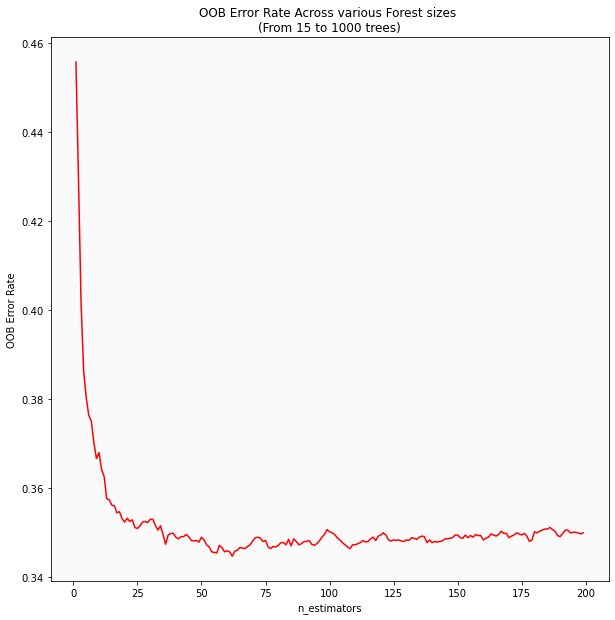

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [58]:
rf_model.set_params(n_estimators=25,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=6, min_samples_leaf=75, min_samples_split=100,
                       n_estimators=25, random_state=101)

In [59]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

In [60]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.66259765625
0.606015037593985


In [61]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1017
           1       0.32      0.58      0.41       313

    accuracy                           0.61      1330
   macro avg       0.57      0.60      0.56      1330
weighted avg       0.71      0.61      0.64      1330



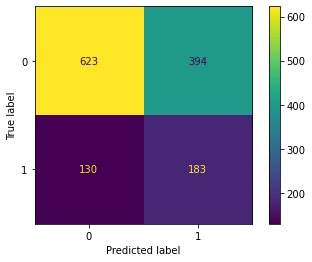

In [62]:
plot_confusion_matrix(rf_model, X_test, y_test)

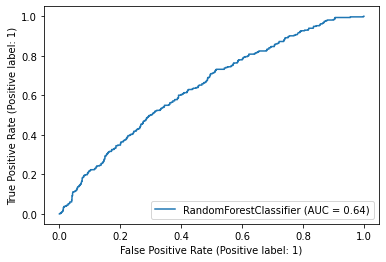

In [63]:
plot_roc_curve(rf_model, X_test, y_test)

In [65]:
xgb_model = XGBClassifier()

In [79]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[15:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66890
[1]	validation_0-logloss:0.65594
[2]	validation_0-logloss:0.64927
[3]	validation_0-logloss:0.64613
[4]	validation_0-logloss:0.64538
[5]	validation_0-logloss:0.64504
[6]	validation_0-logloss:0.64186
[7]	validation_0-logloss:0.64178
[8]	validation_0-logloss:0.64154
[9]	validation_0-logloss:0.64299
[10]	validation_0-logloss:0.64399
[11]	validation_0-logloss:0.64261
[12]	validation_0-logloss:0.64273
[13]	validation_0-logloss:0.64245
[14]	validation_0-logloss:0.64345
[15]	validation_0-logloss:0.64559
[16]	validation_0-logloss:0.64757
[17]	validation_0-logloss:0.64872
[18]	validation_0-logloss:0.64858


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

In [81]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.7274169921875
0.6015037593984962


In [82]:
param_grid = {"colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)}

In [86]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

In [87]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[15:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:

[15:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_pa...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000215428944C0>,
   

In [88]:
random_search.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8935310086091695,
 'gamma': 0.3344620298315498,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.28925026952157096,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 147,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.7123089449763423,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [89]:
xgb_model.set_params(colsample_bytree=0.894, gamma=0.33, learning_rate=0.29, max_depth=5, n_estimators=147, subsample=0.71)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.894, gamma=0.33, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.29, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=147, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.71,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[15:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67680
[1]	validation_0-logloss:0.66360
[2]	validation_0-logloss:0.65992
[3]	validation_0-logloss:0.65548
[4]	validation_0-logloss:0.64948
[5]	validation_0-logloss:0.64422
[6]	validation_0-logloss:0.64536
[7]	validation_0-logloss:0.64364
[8]	validation_0-logloss:0.64313
[9]	validation_0-logloss:0.63945
[10]	validation_0-logloss:0.63998
[11]	validation_0-logloss:0.63984
[12]	validation_0-logloss:0.64006
[13]	validation_0-logloss:0.64182
[14]	validation_0-logloss:0.64339
[15]	validation_0-logloss:0.64405
[16]	validation_0-logloss:0.64323
[17]	validation_0-logloss:0.64427
[18]	validation_0-logloss:0.64440


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.894, gamma=0.33, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.29, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=147, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.71,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

In [100]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.697998046875
0.6037593984962406


In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
gaussian_nb = GaussianNB()

In [95]:
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [96]:
train_pred = gaussian_nb.predict(X_train)
test_pred = gaussian_nb.predict(X_test)

In [97]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.6378173828125
0.5323308270676692


In [101]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71      1017
           1       0.30      0.53      0.39       313

    accuracy                           0.60      1330
   macro avg       0.56      0.58      0.55      1330
weighted avg       0.69      0.60      0.63      1330



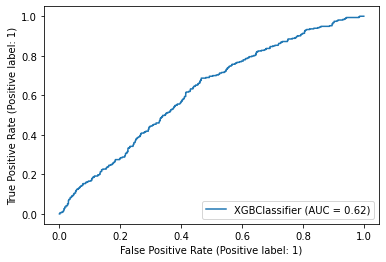

In [102]:
plot_roc_curve(xgb_model, X_test, y_test)

In [103]:
from sklearn.svm import SVC

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [108]:
svm_model = SVC(random_state=101)

In [106]:
param_grid = {'C': [1.0, 5.0, 10.0, 100.0],
              'kernel': ['rbf', 'linear', 'poly'],
              'degree': [2, 3],
              'gamma': ['scale', 'auto']}

In [ ]:
svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='accuracy')
svm_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

In [109]:
svm_model.fit(scaled_X_train, y_train)

SVC(random_state=101)

In [111]:
train_pred = svm_model.predict(scaled_X_train)
test_pred = svm_model.predict(scaled_X_test)

In [112]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.765625
0.6233082706766917


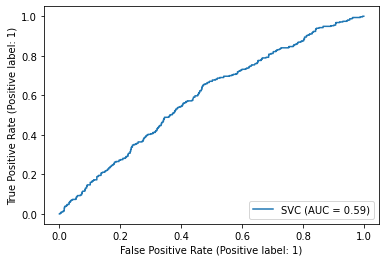

In [114]:
plot_roc_curve(svm_model, scaled_X_test, y_test)

In [ ]:
#Xgboost performs better compared to other models